# Seaborn 


Seaborn proveides an API on top of Matpotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provide by Pandas DataFrame.

### Seaborn VS Matplotlib

Here is example of simple radndom-walk plot Matplotlib, using its classic plot formatting and color-


In [16]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
# Create some random data
rng=np.random.RandomState(0)
x=np.linspace(0,10,500)
y=np.cumsum(rng.randn(500,6),0) 
#cumulative sum of the elements along a given axis

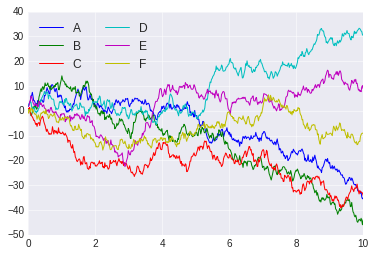

In [7]:
# Plot the data with Matplotlib defaults
plt.plot(x,y)
plt.legend("ABCDEF",ncol=2,loc="upper left")

Although the result contain all the information we'd like it to convay, it does so in a way that is not all that aesthetically pleasing, and even looks a old-fashioned.

Now let's take a look at how it works with Seaborn.

In [12]:
import seaborn as sns
sns.set(style="darkgrid")# set the style 

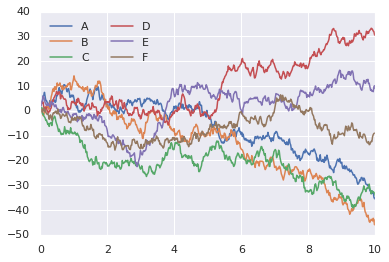

In [13]:
#some plotting code as above!
plt.plot(x,y)
plt.legend("ABCDEF",ncol=2,loc="upper left")

#Exploring Seaborn Plots

The main ides of Seaborn is that it provides high-level commands to create a variety of plot types usful for statistical data exploration, and even statistical model fitting.

### Histogram,KDE, and densities



In [17]:
data=np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=200)
data=pd.DataFrame(data,columns=["x","y"])
data.head()

,x,y
0,-0.169399,2.175069
1,-1.082283,-0.319439
2,-1.528678,-0.833433
3,0.662895,1.000461
4,1.206940,0.130199


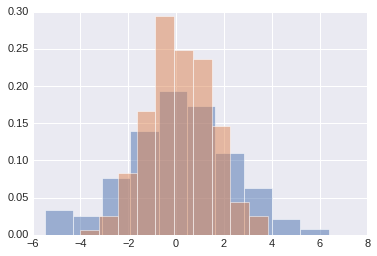

In [31]:
for col in "xy":
    plt.hist(data[col],alpha=0.5,
             density=True,
            )

Rather than a histogram, we can get a smooth estimate of the distribution using a kernel density estimation, which Seaborn does with __sns.kdeplot()__:

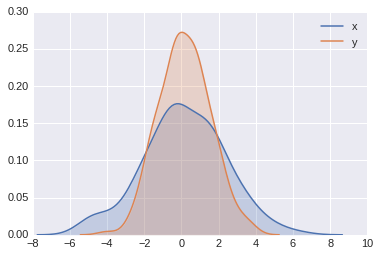

In [33]:
for col in "xy": # for latter in "xy":
    sns.kdeplot(data[col],
                shade=True, #shade area under plot line
               )

Histogram and KDE can be combined using displot:

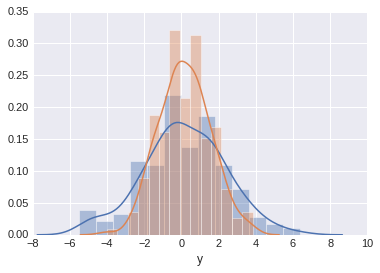

In [32]:
sns.distplot(data["x"])
sns.distplot(data["y"])

if we pass the two-dimesional dataset to kedplot, we will get two-dimensional visualization of the data:


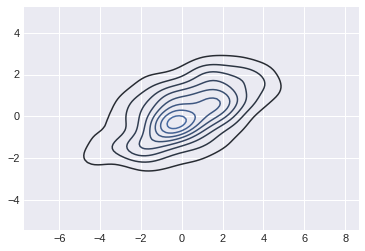

In [38]:
sns.kdeplot(data);

We can see the join distibution and the marginal distributions together using __sns.jointplot()__

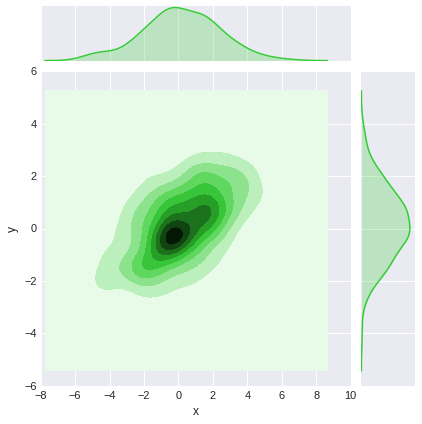

In [41]:
sns.jointplot("x","y",data,kind="kde",color="limegreen");

There are other parameters that can be passed to joinplot - for example, we can used hexagonally based histogram instead

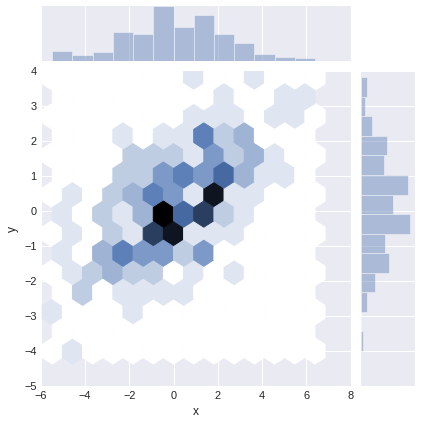

In [60]:
sns.jointplot("x","y",data,kind="hex")

### Pair plot

When you generalize joint plots to dataset of larger dimesions, you end up with pair plot. This is very useful for exploring  correlations between multidimesional data, when you'd like to plot all pairs of values against each other.



In [61]:
iris=sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [64]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Visualization the multiodimsional reletionships among the sample is as easy as calling __sns.pairplot()__:

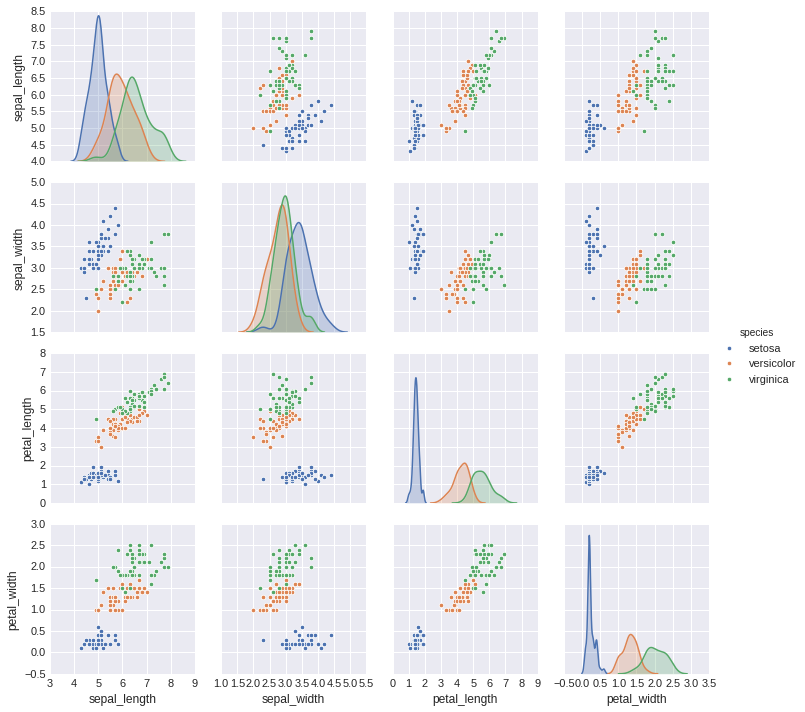

In [66]:
sns.pairplot(iris,hue="species",size=2.5)

### Faceded histogram

Some times is best way to view data is via histograms of subsets. Seabors's FacetGread makes this extremely simple. 

In [67]:
tips=sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


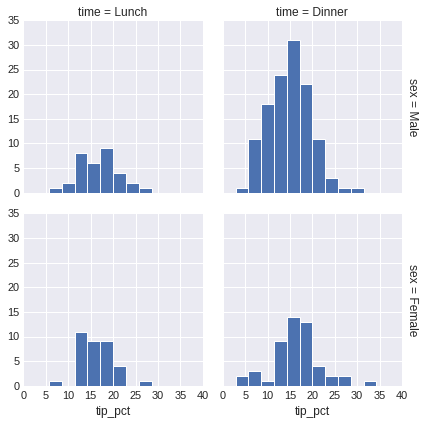

In [75]:
tips["tip_pct"]=100*tips["tip"]/tips["total_bill"]
grid=sns.FacetGrid(data=tips,
                   row="sex",
                   col="time",
                   margin_titles=True
                  ,)
grid.map(plt.hist,"tip_pct",bins=np.linspace(0,40,15));

# Factor plot

Factor plot can be useful for this kind of visulalization as well. This allows as to view the distribution of parameter within bis defined by any other parameter 

/home/mariox/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


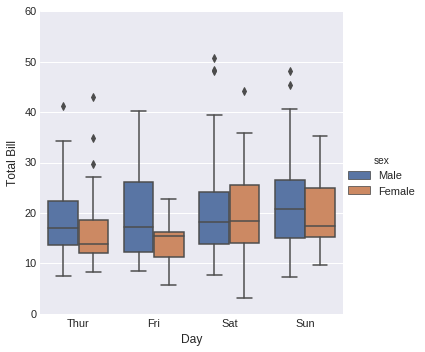

In [77]:
g=sns.factorplot("day","total_bill","sex",data=tips,kind="box")
g.set_axis_labels("Day","Total Bill")

## Jon plot

Similar to the pair plots , we can used __sns.jointplot()__ to show the jint distibution between fifferent datasets, along with assiciated marginal distribution

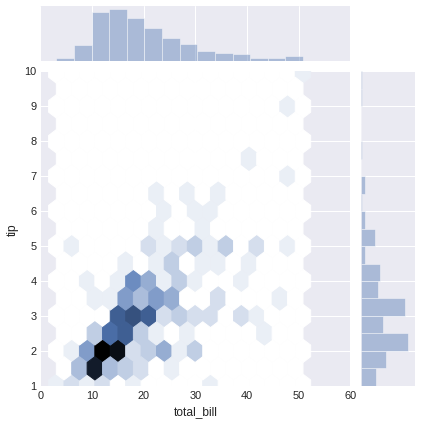

In [78]:
sns.jointplot("total_bill","tip",data=tips,kind="hex")

The join plot can even do some automatic kernal density estimation ad regression

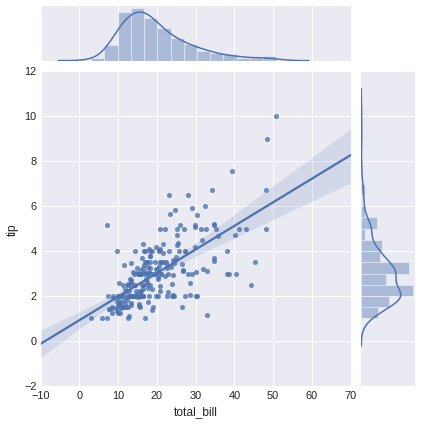

In [80]:
sns.jointplot("total_bill","tip",data=tips,kind="reg")

## Bar plots

Time siries can be plotted with __sns.factorplot()__. In following example:

In [81]:
planets= sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


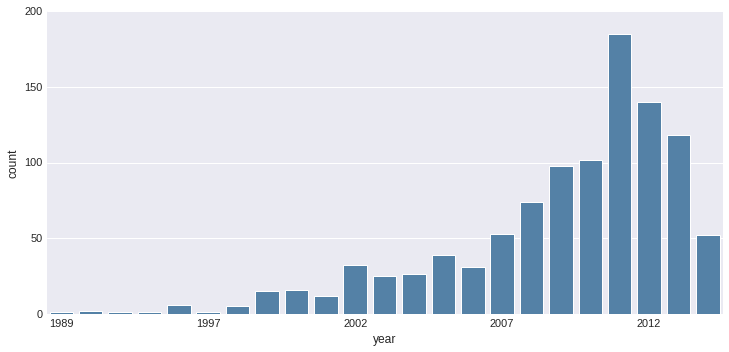

In [99]:
g=sns.factorplot("year",data=planets, 
             aspect=2,
              kind="count",
              color="steelblue",
             )
g.set_xticklabels(step=5)

We can learn more by looking at the method of discovery of each of these planets, as
illustrated 

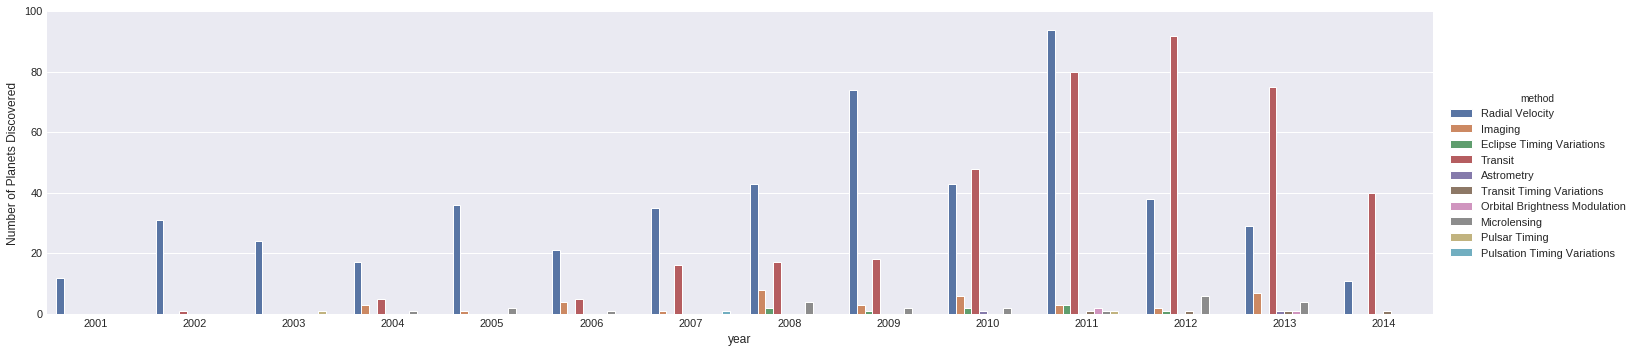

In [100]:
g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
 hue='method', order=range(2001, 2015))
g.set_ylabels('Number of Planets Discovered')